<a href="https://colab.research.google.com/github/Joacco11/TelecomX_Latam-Part-1/blob/main/TelecomX_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

##📌 Extracción(E - Extract)

In [290]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_origen = pd.read_json(url)

df_origen.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🔧 Transformación (T - Transform)

###Conoce el conjunto de Datos

El primer problema que observamos es que las columnas son diccionarios. Es necesario normalizar para que el dataFrame sea más legible

In [262]:
df_origen.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [263]:
# Normalizar
df_normalize = json_normalize(df_origen.to_dict(orient="records"))
df_normalize.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

####Normalización

In [264]:
rename_dict = {
    "customerID": "id_cliente",
    "Churn": "churn",
    "customer.gender": "genero",
    "customer.SeniorCitizen": "adulto_mayor",
    "customer.Partner": "pareja",
    "customer.Dependents": "dependientes",
    "customer.tenure": "antiguedad_meses",
    "phone.PhoneService": "servicio_telefonico",
    "phone.MultipleLines": "lineas_multiples",
    "internet.InternetService": "servicio_internet",
    "internet.OnlineSecurity": "seguridad_en_linea",
    "internet.OnlineBackup": "respaldo_en_linea",
    "internet.DeviceProtection": "proteccion_dispositivo",
    "internet.TechSupport": "soporte_tecnico",
    "internet.StreamingTV": "streaming_tv",
    "internet.StreamingMovies": "streaming_peliculas",
    "account.Contract": "tipo_contrato",
    "account.PaperlessBilling": "facturacion_electronica",
    "account.PaymentMethod": "metodo_pago",
    "account.Charges.Monthly": "cargo_mensual",
    "account.Charges.Total": "cargo_total"
}

df = df_normalize.rename(columns=rename_dict)
df.head()

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####Desarrollo del diccionario

In [265]:
metadata = pd.DataFrame([
    ["id_cliente", "ID único del cliente"],
    ["churn", "Indica si el cliente se dio de baja (Yes/No)"],
    ["genero", "Género del cliente (Masculino/Femenino)"],
    ["adulto_mayor", "Indica si el cliente es adulto mayor (1 = Sí, 0 = No)"],
    ["pareja", "Indica si el cliente tiene pareja (Yes/No)"],
    ["dependientes", "Indica si el cliente tiene dependientes (Yes/No)"],
    ["antiguedad_meses", "Meses que el cliente ha permanecido con la empresa"],
    ["servicio_telefonico", "Si el cliente tiene servicio telefónico (Yes/No)"],
    ["lineas_multiples", "Si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service)"],
    ["servicio_internet", "Tipo de servicio de internet (DSL, Fibra óptica, Ninguno)"],
    ["seguridad_en_linea", "Si el cliente contrató seguridad en línea"],
    ["respaldo_en_linea", "Si el cliente contrató respaldo en línea"],
    ["proteccion_dispositivo", "Si el cliente tiene protección de dispositivos"],
    ["soporte_tecnico", "Si el cliente tiene soporte técnico adicional"],
    ["streaming_tv", "Si el cliente tiene servicio de TV por streaming"],
    ["streaming_peliculas", "Si el cliente tiene servicio de películas por streaming"],
    ["tipo_contrato", "Tipo de contrato del cliente (Mensual, 1 año, 2 años)"],
    ["facturacion_electronica", "Si el cliente usa facturación electrónica (Yes/No)"],
    ["metodo_pago", "Método de pago del cliente"],
    ["cargo_mensual", "Monto facturado mensualmente al cliente"],
    ["cargo_total", "Monto total facturado al cliente durante toda su permanencia"],
], columns=["columna", "descripcion"])
metadata

,columna,descripcion
0,id_cliente,ID único del cliente
1,churn,Indica si el cliente se dio de baja (Yes/No)
2,genero,Género del cliente (Masculino/Femenino)
3,adulto_mayor,"Indica si el cliente es adulto mayor (1 = Sí, ..."
4,pareja,Indica si el cliente tiene pareja (Yes/No)
5,dependientes,Indica si el cliente tiene dependientes (Yes/No)
6,antiguedad_meses,Meses que el cliente ha permanecido con la emp...
7,servicio_telefonico,Si el cliente tiene servicio telefónico (Yes/No)
8,lineas_multiples,Si el cliente tiene múltiples líneas telefónic...
9,servicio_internet,"Tipo de servicio de internet (DSL, Fibra óptic..."


###Solución de Incoherencias

#### Duplicados

> No hay duplicados



In [266]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


####Valores nulos

>No hay valores nulos, pero sí hay registros que hacen que algunas columnas se porten como object. Así que hay que detectarlos

In [267]:
# Conteo de nulos reales
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 id_cliente                 0
churn                      0
genero                     0
adulto_mayor               0
pareja                     0
dependientes               0
antiguedad_meses           0
servicio_telefonico        0
lineas_multiples           0
servicio_internet          0
seguridad_en_linea         0
respaldo_en_linea          0
proteccion_dispositivo     0
soporte_tecnico            0
streaming_tv               0
streaming_peliculas        0
tipo_contrato              0
facturacion_electronica    0
metodo_pago                0
cargo_mensual              0
cargo_total                0
dtype: int64


#####Detección de caracteres especiales
>Detecto los valores String de cada columna para identificar los valores que no me sirven

In [268]:
# Diccionario para almacenar resultados
resultados = {}

for col in df.columns:
    # Intentamos convertir toda la columna a numérico
    col_as_str = df[col].astype(str).str.strip()  # por si hay espacios

    # Intentar conversión
    not_numeric = col_as_str[~col_as_str.str.replace('.', '', 1).str.replace('-', '', 1).str.isnumeric()]

    if len(not_numeric) > 0:
        resultados[col] = not_numeric.value_counts()

# Mostrar reporte
for col, valores in resultados.items():
    print(f"\n Columna: {col}")
    print(valores.reset_index().rename(columns={"index": "Valor", col: "Frecuencia"}))


 Columna: id_cliente
      Frecuencia  count
0     9995-HOTOH      1
1     0002-ORFBO      1
2     0003-MKNFE      1
3     9970-QBCDA      1
4     9968-FFVVH      1
...          ...    ...
7262  0014-BMAQU      1
7263  0013-SMEOE      1
7264  0013-MHZWF      1
7265  0013-EXCHZ      1
7266  0011-IGKFF      1

[7267 rows x 2 columns]

 Columna: churn
  Frecuencia  count
0         No   5174
1        Yes   1869
2               224

 Columna: genero
  Frecuencia  count
0       Male   3675
1     Female   3592

 Columna: pareja
  Frecuencia  count
0         No   3749
1        Yes   3518

 Columna: dependientes
  Frecuencia  count
0         No   5086
1        Yes   2181

 Columna: servicio_telefonico
  Frecuencia  count
0        Yes   6560
1         No    707

 Columna: lineas_multiples
         Frecuencia  count
0                No   3495
1               Yes   3065
2  No phone service    707

 Columna: servicio_internet
    Frecuencia  count
0  Fiber optic   3198
1          DSL   2488
2     

##### Transformaciones de cadenas en blanco
>CHurn y total_charges tienen cadenas de texto en blanco. Así que Churn lo dejo lo reemplazo en No se sabe y en total_charges lo reemplazo a NaN

In [269]:
# Reemplazar cualquier cadena vacía o con solo espacios en churn por "No se sabe"
df["churn"] = df["churn"].replace(r'^\s*$', "No se sabe", regex=True)

# Reemplazar espacios en blanco por NaN en total_charges
df["cargo_total"] = df["cargo_total"].replace(r'^\s*$', np.nan, regex=True)

# Convertir total_charges a float
df["cargo_total"] = pd.to_numeric(df["cargo_total"], errors="coerce")

# Verificar resultados
print(df["churn"].value_counts(dropna=False))
print(df["cargo_total"].isna().sum(), "valores nulos en cargo_total")
print(df.dtypes[["churn", "cargo_total"]])

churn
No            5174
Yes           1869
No se sabe     224
Name: count, dtype: int64
11 valores nulos en cargo_total
churn           object
cargo_total    float64
dtype: object


###Columna de Cuentas Diarias

In [270]:
# Crear columna Cuentas_Diarias a partir de monthly_charges
df["Cuentas_Diarias"] = (df["cargo_mensual"] / 30).round(2)

# Revisamos un vistazo rápido
df.head()

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


###Estandarización y transformación de los Datos

In [271]:
# Seleccionamos las columnas que solo tienen Yes/No
cols_yes_no = [col for col in df.columns if df[col].isin(["Yes", "No"]).all()]

# Convertimos Yes/No a booleanos
df[cols_yes_no] = df[cols_yes_no].replace({"Yes": True, "No": False})

# Convertimos adulto_mayor (0/1) a booleano
if set(df["adulto_mayor"].unique()) <= {0,1}:  # solo si tiene 0/1
    df["adulto_mayor"] = df["adulto_mayor"].astype(bool)

# Muestreo rápido
sample = df.sample(n=10, random_state=13)
df.set_index("id_cliente", inplace=True)
sample

/tmp/ipython-input-628837223.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_yes_no] = df[cols_yes_no].replace({"Yes": True, "No": False})


,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,Cuentas_Diarias
4257,5850-BDWCY,No,Female,False,False,False,6,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,20.20,123.65,0.67
7258,9978-HYCIN,No,Male,True,True,True,47,True,No,Fiber optic,...,No,No,Yes,No,One year,True,Bank transfer (automatic),84.95,4018.05,2.83
4065,5567-GZKQY,No,Male,False,False,False,58,True,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Credit card (automatic),20.30,1131.50,0.68
4318,5931-FLJJF,Yes,Male,True,True,False,7,True,No,Fiber optic,...,No,No,No,No,Month-to-month,True,Mailed check,70.10,467.55,2.34
780,1100-DDVRV,No,Male,False,True,False,17,False,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,True,Mailed check,49.80,836.35,1.66
4447,6097-EQISJ,Yes,Female,False,True,True,66,True,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,True,Credit card (automatic),102.45,6615.15,3.42
2215,3092-IGHWF,Yes,Male,False,True,True,67,True,Yes,Fiber optic,...,Yes,No,No,No,One year,False,Electronic check,87.40,5918.80,2.91
1923,2720-FVBQP,No,Female,False,True,True,6,True,Yes,DSL,...,No,No,No,No,Month-to-month,True,Credit card (automatic),48.95,273.25,1.63
1905,2692-BUCFV,No,Male,True,False,False,29,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Bank transfer (automatic),101.45,2948.60,3.38
1330,1925-LFCZZ,No,Male,True,False,False,55,False,No phone service,DSL,...,Yes,No,Yes,Yes,One year,True,Bank transfer (automatic),50.05,2743.45,1.67


In [272]:
# Resumen de tipos de columnas
print(df.dtypes.value_counts())

# Listado detallado de cada columna con su tipo
print("\nTipos de columnas en el DataFrame:")
print(df.dtypes)

object     12
bool        5
float64     3
int64       1
Name: count, dtype: int64

Tipos de columnas en el DataFrame:
churn                       object
genero                      object
adulto_mayor                  bool
pareja                        bool
dependientes                  bool
antiguedad_meses             int64
servicio_telefonico           bool
lineas_multiples            object
servicio_internet           object
seguridad_en_linea          object
respaldo_en_linea           object
proteccion_dispositivo      object
soporte_tecnico             object
streaming_tv                object
streaming_peliculas         object
tipo_contrato               object
facturacion_electronica       bool
metodo_pago                 object
cargo_mensual              float64
cargo_total                float64
Cuentas_Diarias            float64
dtype: object


##📊 Carga y análisis(L - Load & Analysis)

###Análisis Descriptivo

####Separamos por tipo de dato

In [286]:
numericas = df.select_dtypes(include=["int64", "float64"])
categoricas = df.select_dtypes(include=["object"])
binarias = df.select_dtypes(include=["bool"])
print(f"Columnas numéricas: {numericas.columns}")
print(f"Columnas categóricas: {categoricas.columns}")
print(f"Columnas binarias: {binarias.columns}")

Columnas numéricas: Index(['antiguedad_meses', 'cargo_mensual', 'cargo_total', 'Cuentas_Diarias'], dtype='object')
Columnas categóricas: Index(['churn', 'genero', 'lineas_multiples', 'servicio_internet',
       'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
       'soporte_tecnico', 'streaming_tv', 'streaming_peliculas',
       'tipo_contrato', 'metodo_pago'],
      dtype='object')
Columnas binarias: Index(['adulto_mayor', 'pareja', 'dependientes', 'servicio_telefonico',
       'facturacion_electronica'],
      dtype='object')


####Análisis Descriptivo por tipo de Dato

#####Numéricas

In [287]:
desc_num = numericas.describe().T  # Transpuesta para mejor lectura
desc_num["mediana"] = numericas.median()
desc_num["varianza"] = numericas.var()
print(desc_num)

                   count         mean          std    min      25%      50%  \
antiguedad_meses  7267.0    32.346498    24.571773   0.00    9.000    29.00   
cargo_mensual     7267.0    64.720098    30.129572  18.25   35.425    70.30   
cargo_total       7256.0  2280.634213  2268.632997  18.80  400.225  1391.00   
Cuentas_Diarias   7267.0     2.157292     1.004407   0.61    1.180     2.34   

                       75%      max  mediana      varianza  
antiguedad_meses    55.000    72.00    29.00  6.037720e+02  
cargo_mensual       89.875   118.75    70.30  9.077911e+02  
cargo_total       3785.300  8684.80  1391.00  5.146696e+06  
Cuentas_Diarias      2.995     3.96     2.34  1.008833e+00  


#####Categóricas

In [288]:
for col in categoricas.columns:
    print(f"\n{col}:")
    dist = categoricas[col].value_counts(normalize=True).round(3) * 100
    print(dist.to_string())


churn:
churn
No            71.2
Yes           25.7
No se sabe     3.1

genero:
genero
Male      50.6
Female    49.4

lineas_multiples:
lineas_multiples
No                  48.1
Yes                 42.2
No phone service     9.7

servicio_internet:
servicio_internet
Fiber optic    44.0
DSL            34.2
No             21.8

seguridad_en_linea:
seguridad_en_linea
No                     49.6
Yes                    28.6
No internet service    21.8

respaldo_en_linea:
respaldo_en_linea
No                     43.8
Yes                    34.5
No internet service    21.8

proteccion_dispositivo:
proteccion_dispositivo
No                     44.0
Yes                    34.3
No internet service    21.8

soporte_tecnico:
soporte_tecnico
No                     49.3
Yes                    29.0
No internet service    21.8

streaming_tv:
streaming_tv
No                     39.9
Yes                    38.4
No internet service    21.8

streaming_peliculas:
streaming_peliculas
No                     3

#####Booleanas

In [289]:
for col in binarias.columns:
    print(f"\n{col}:")
    dist = binarias[col].value_counts(normalize=True).round(3) * 100
    print(dist.to_string())


adulto_mayor:
adulto_mayor
False    83.7
True     16.3

pareja:
pareja
False    51.6
True     48.4

dependientes:
dependientes
False    70.0
True     30.0

servicio_telefonico:
servicio_telefonico
True     90.3
False     9.7

facturacion_electronica:
facturacion_electronica
True     59.3
False    40.7


###Distribución de Evasión

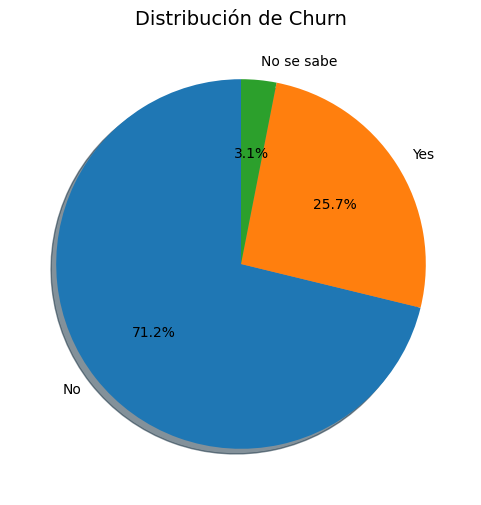

In [295]:
# Distribución de churn
churn_dist = df["churn"].value_counts(normalize=True)

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(
    churn_dist,
    labels=churn_dist.index,
    autopct="%.1f%%",
    startangle=90,
    shadow=True
)
plt.title("Distribución de Churn", fontsize=14)
plt.show()

###Recuento de evasión por categoricas

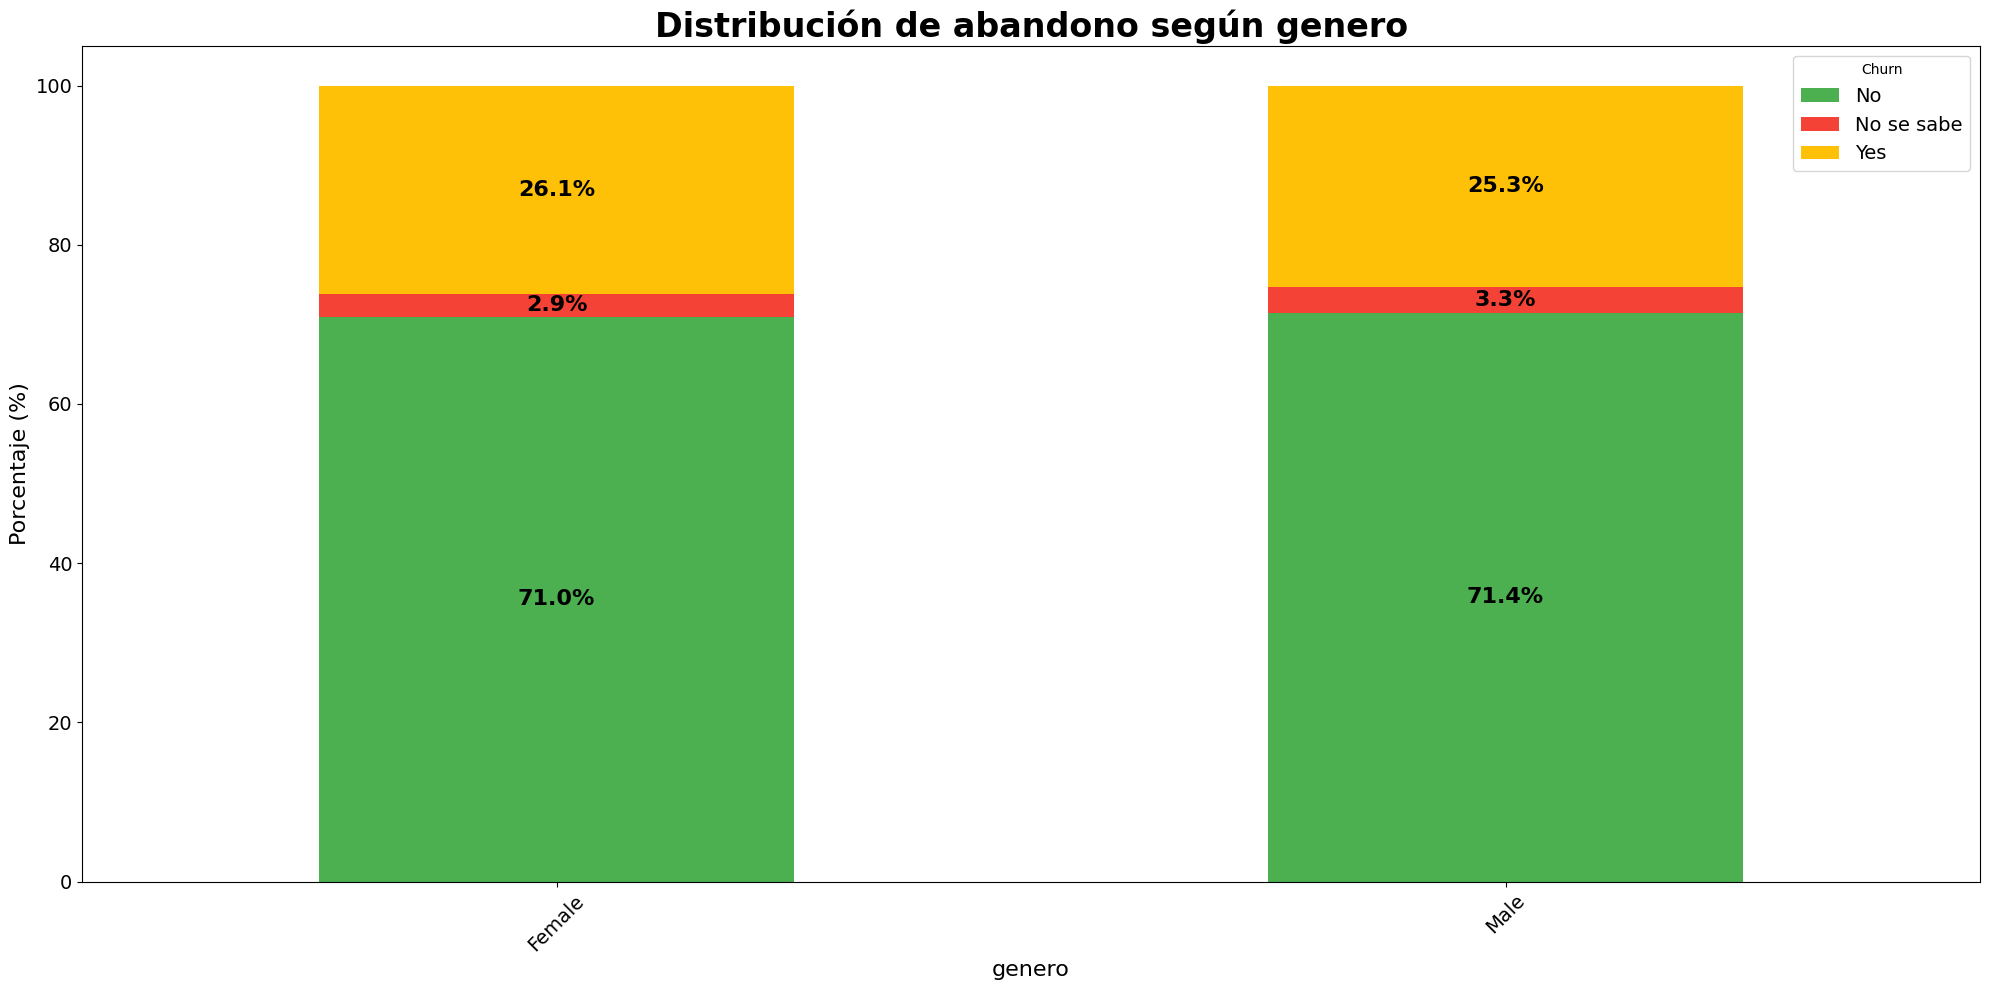

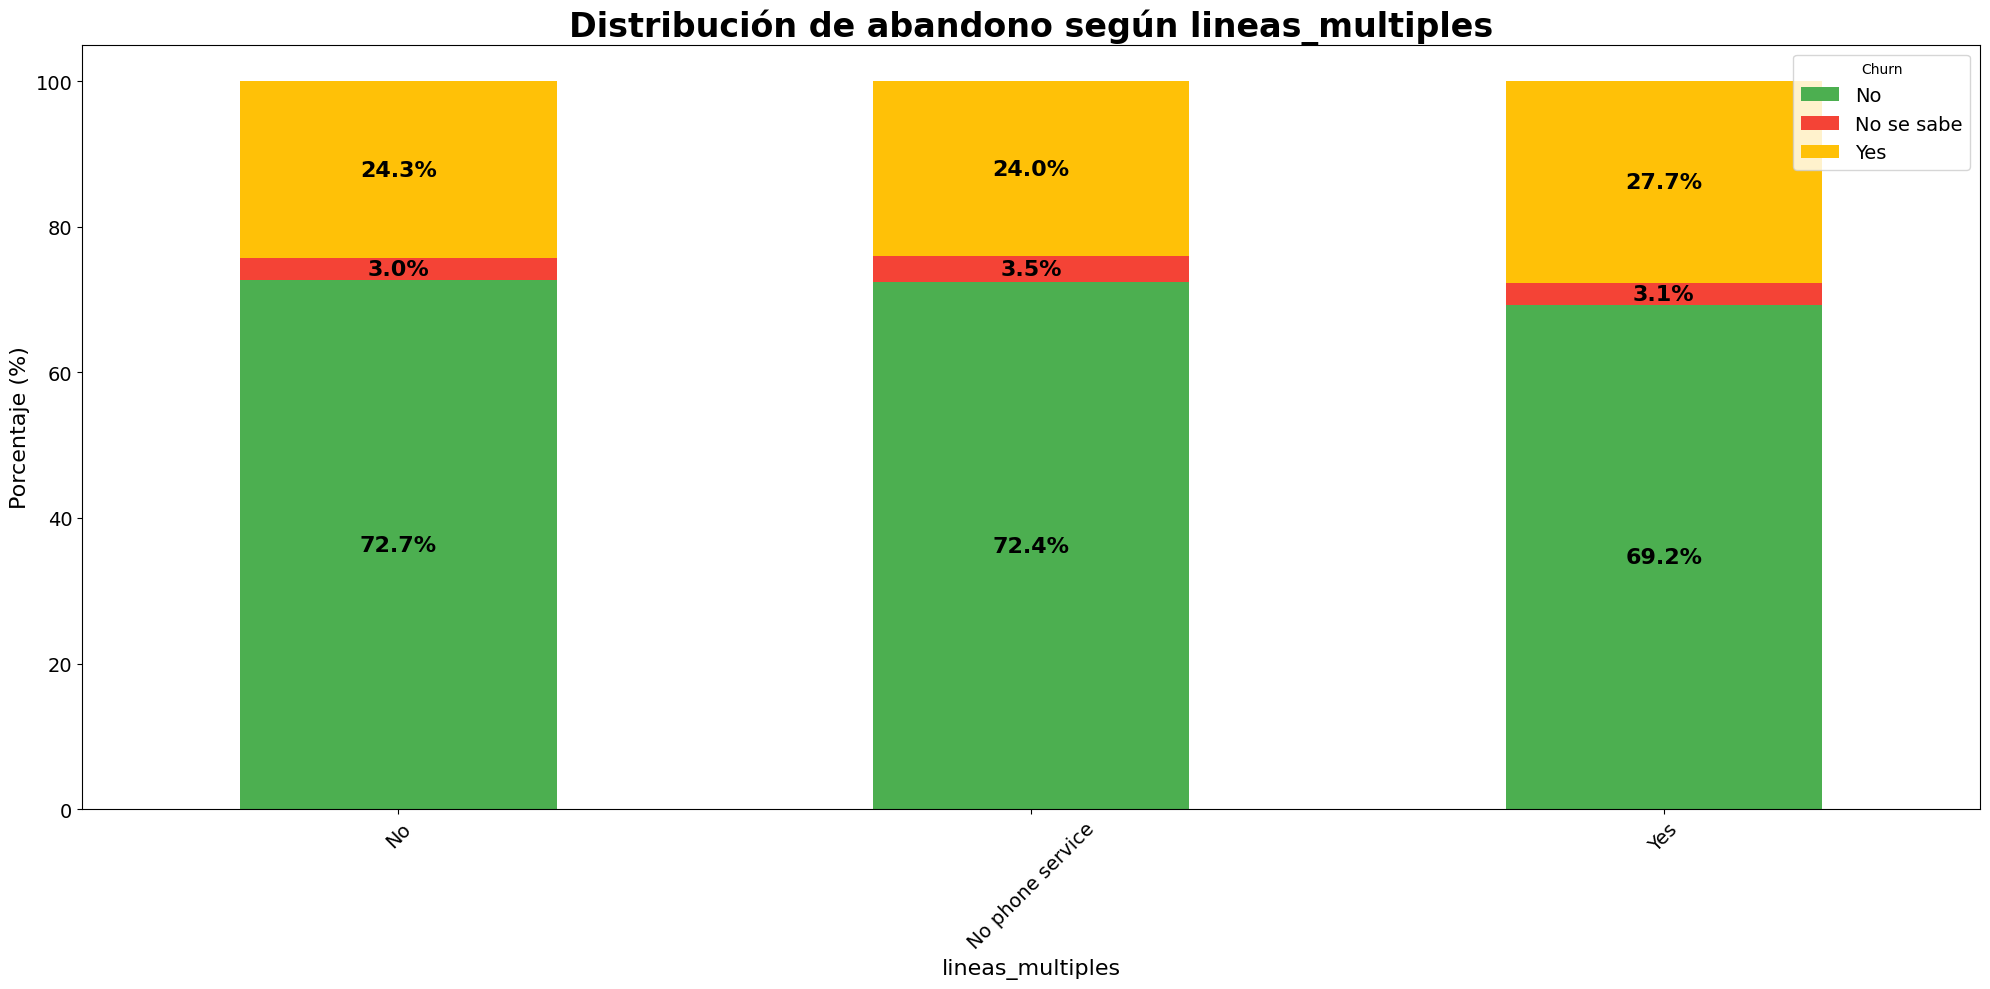

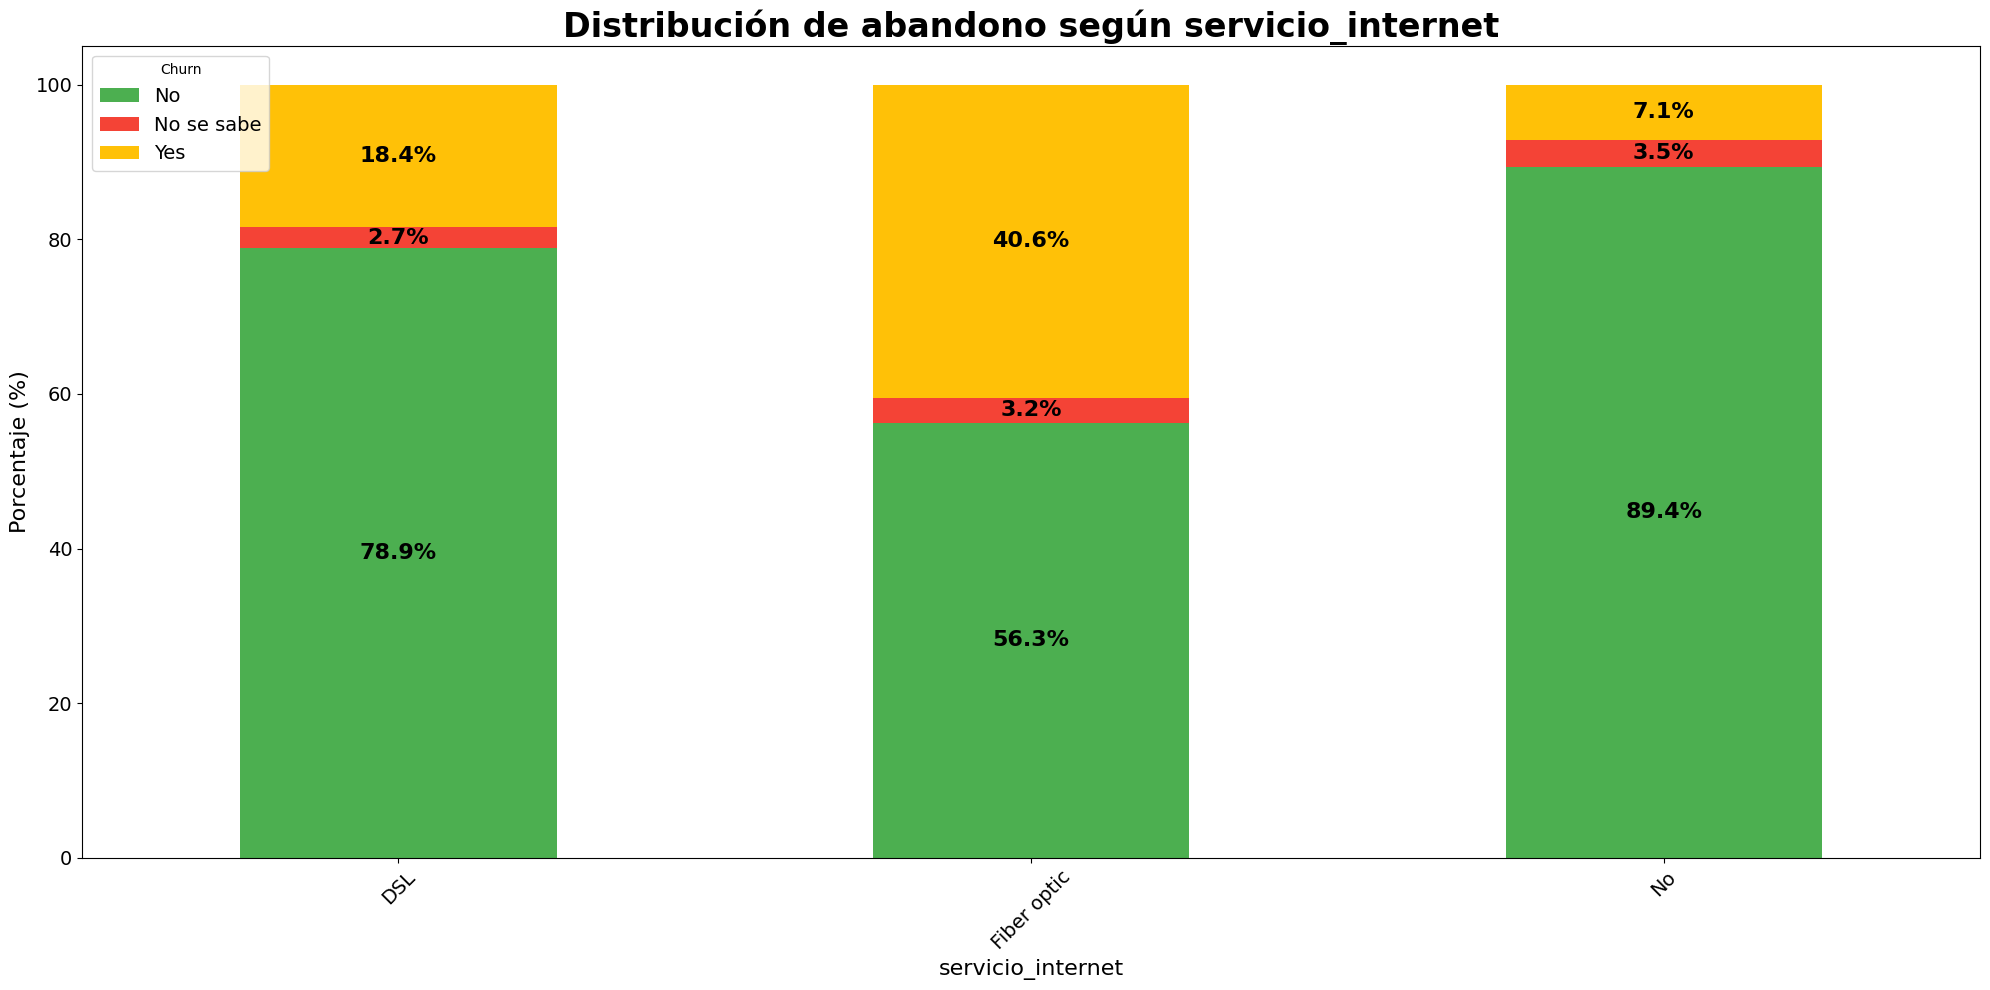

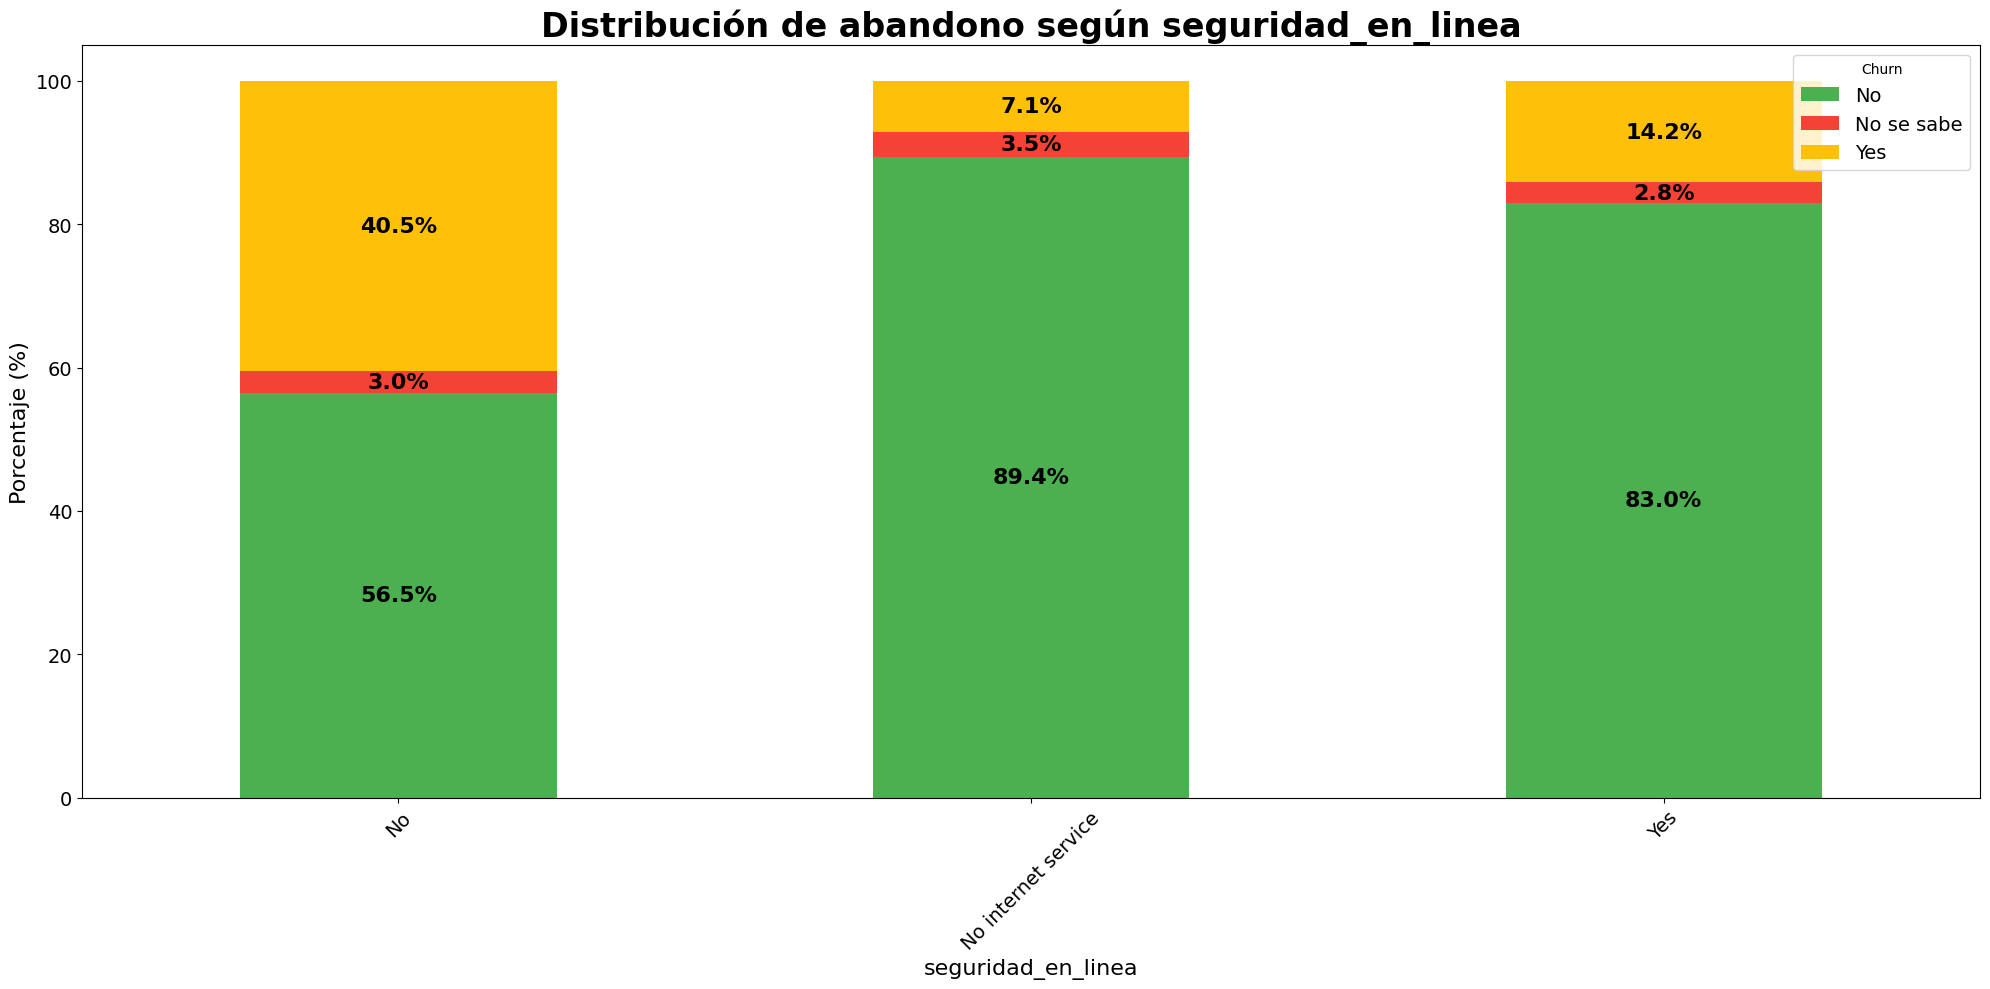

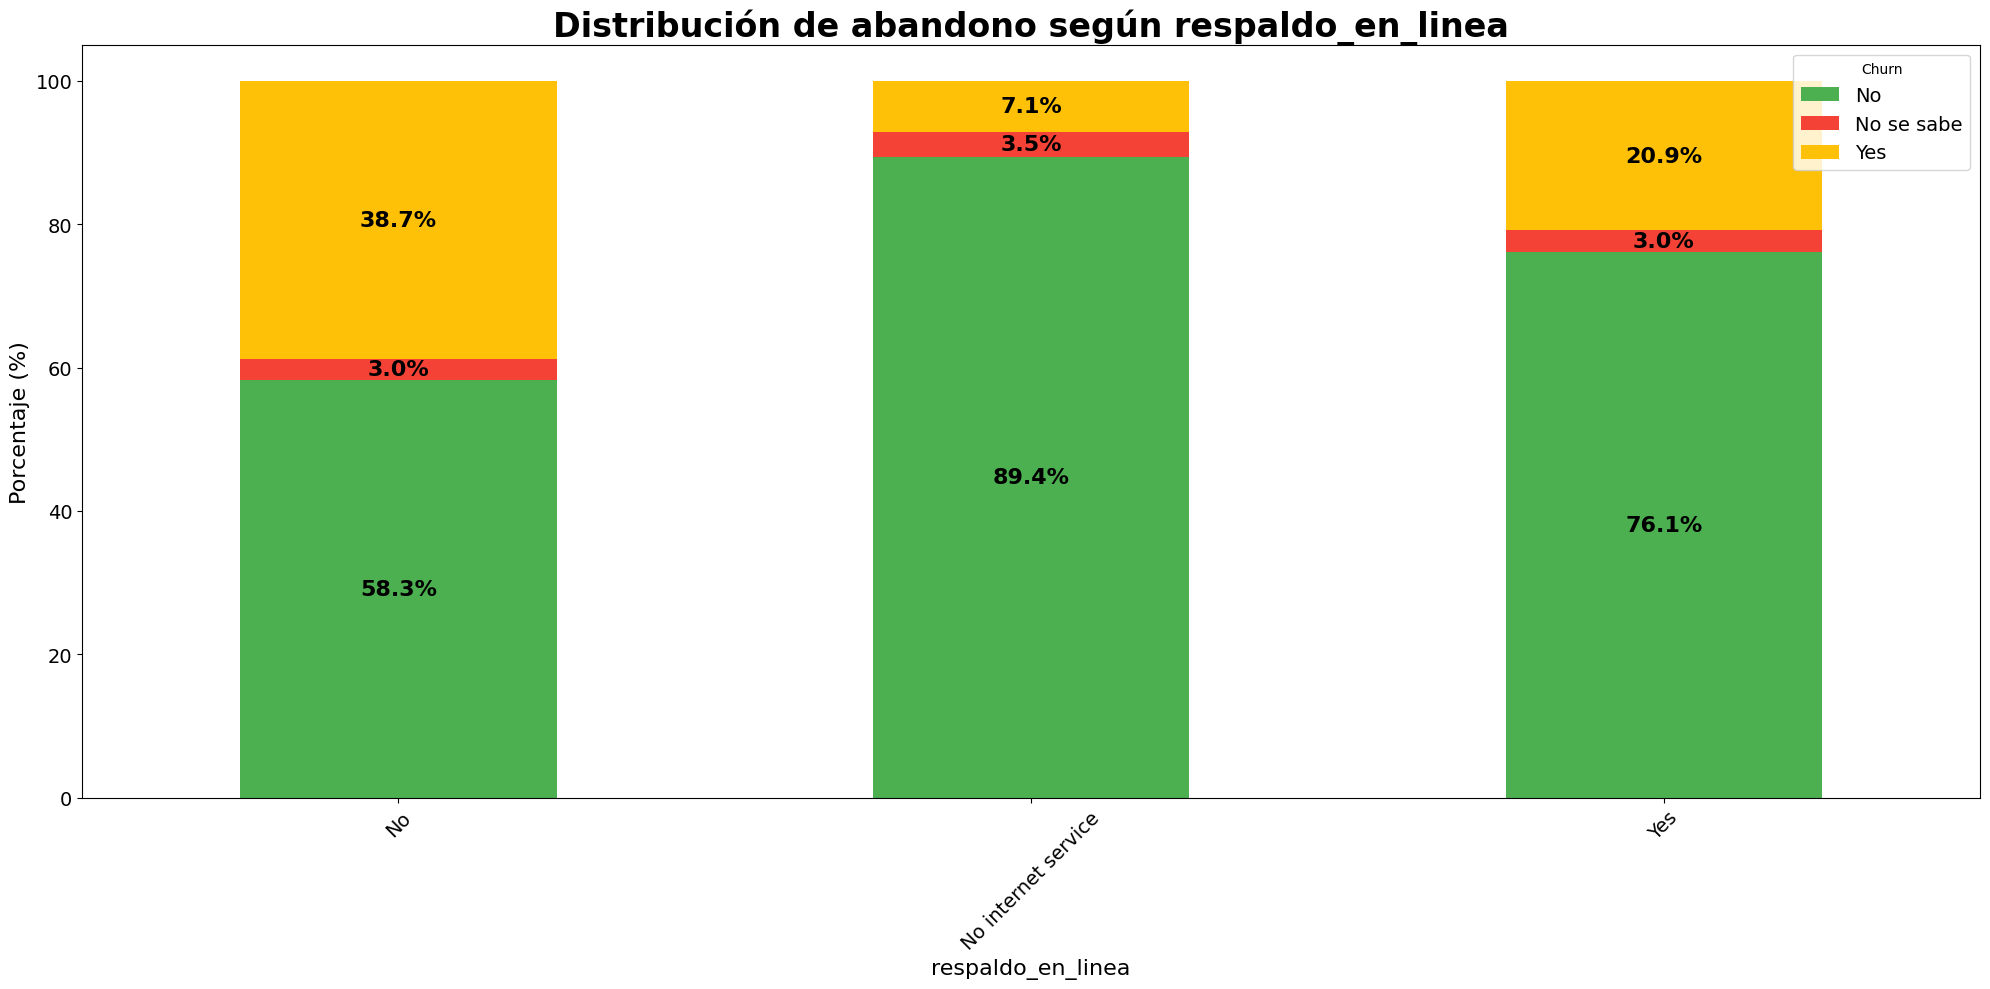

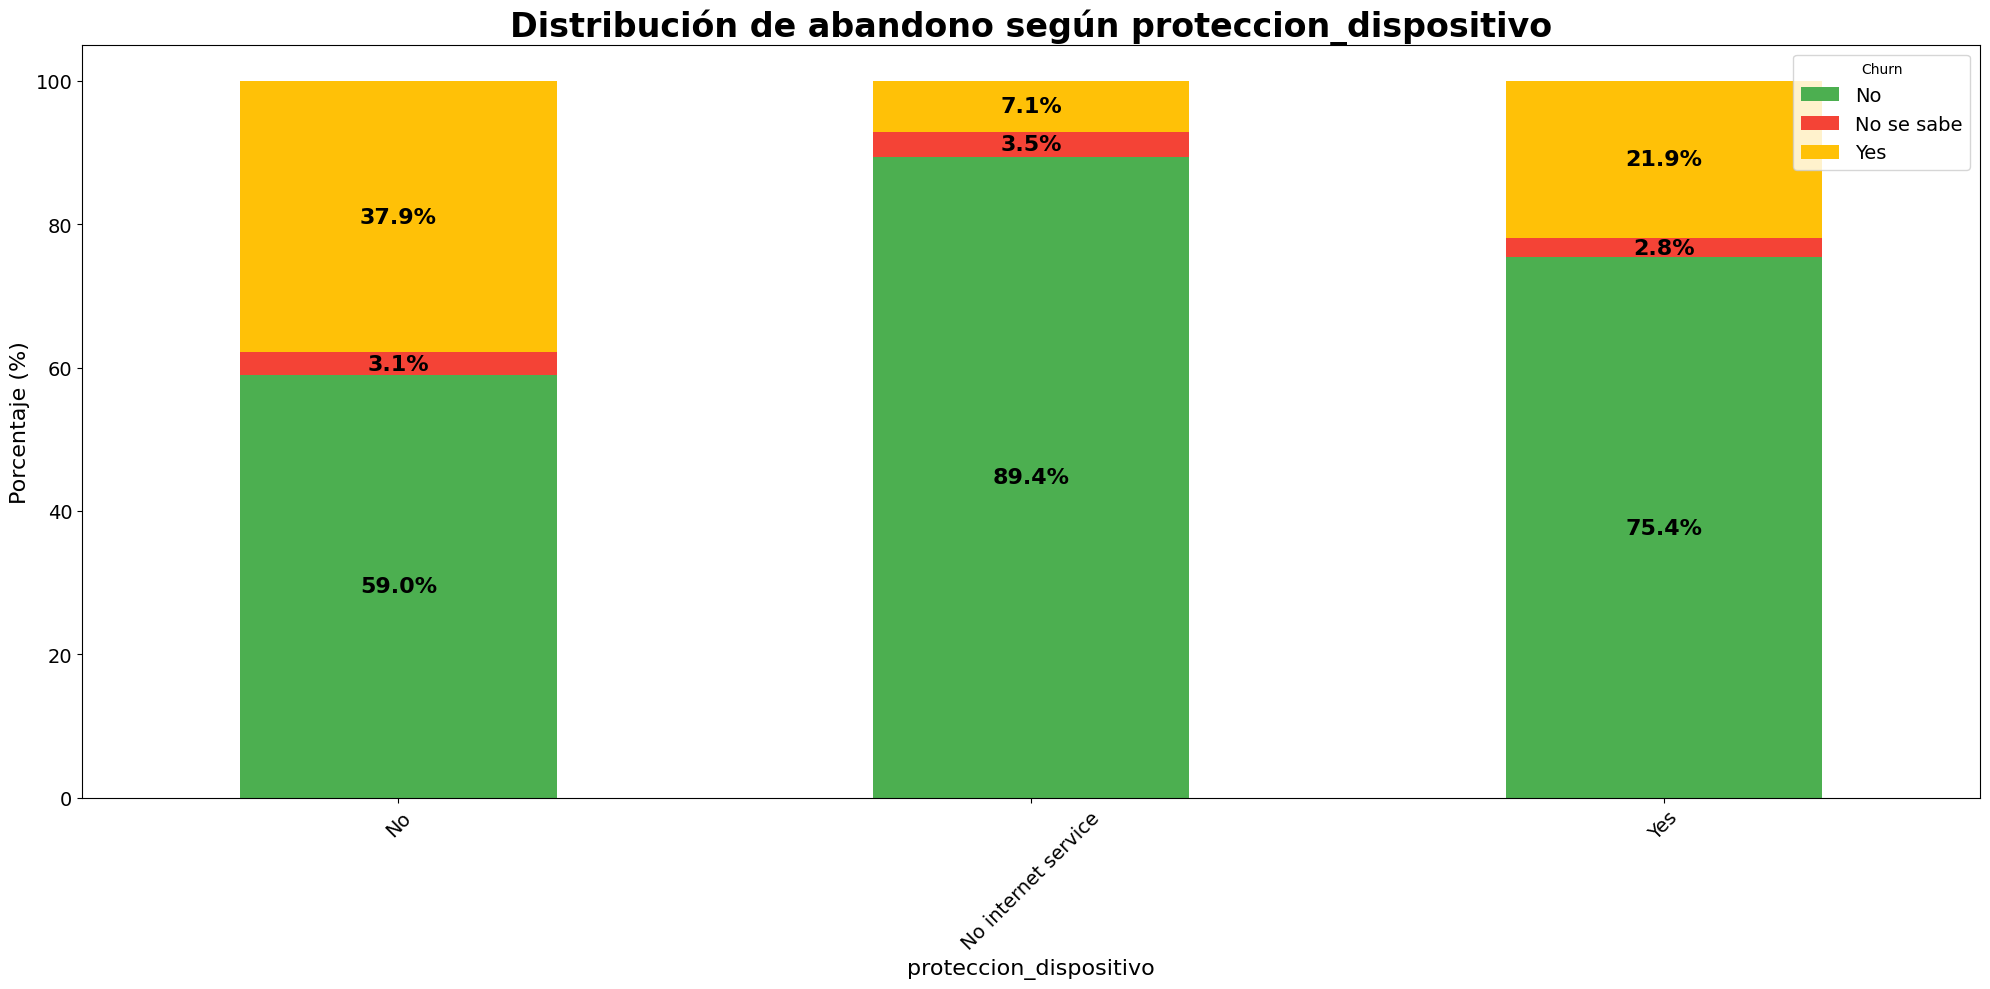

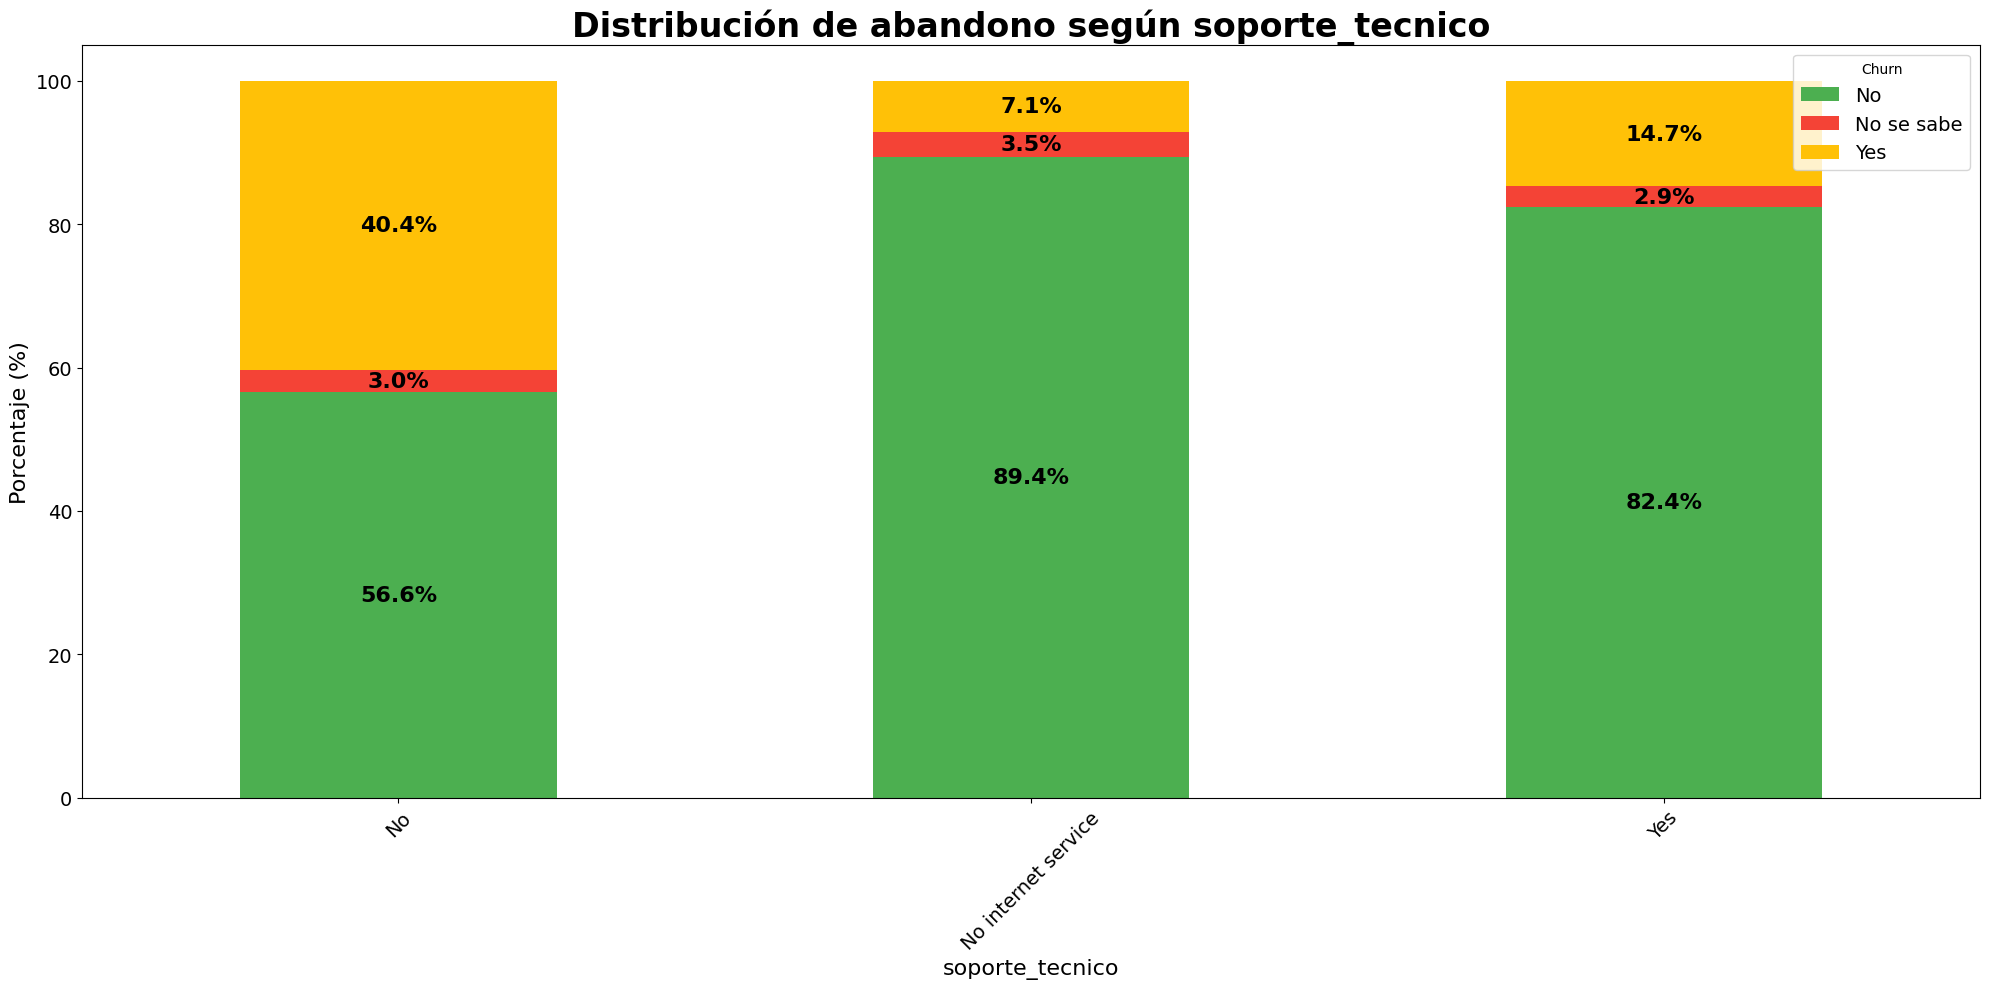

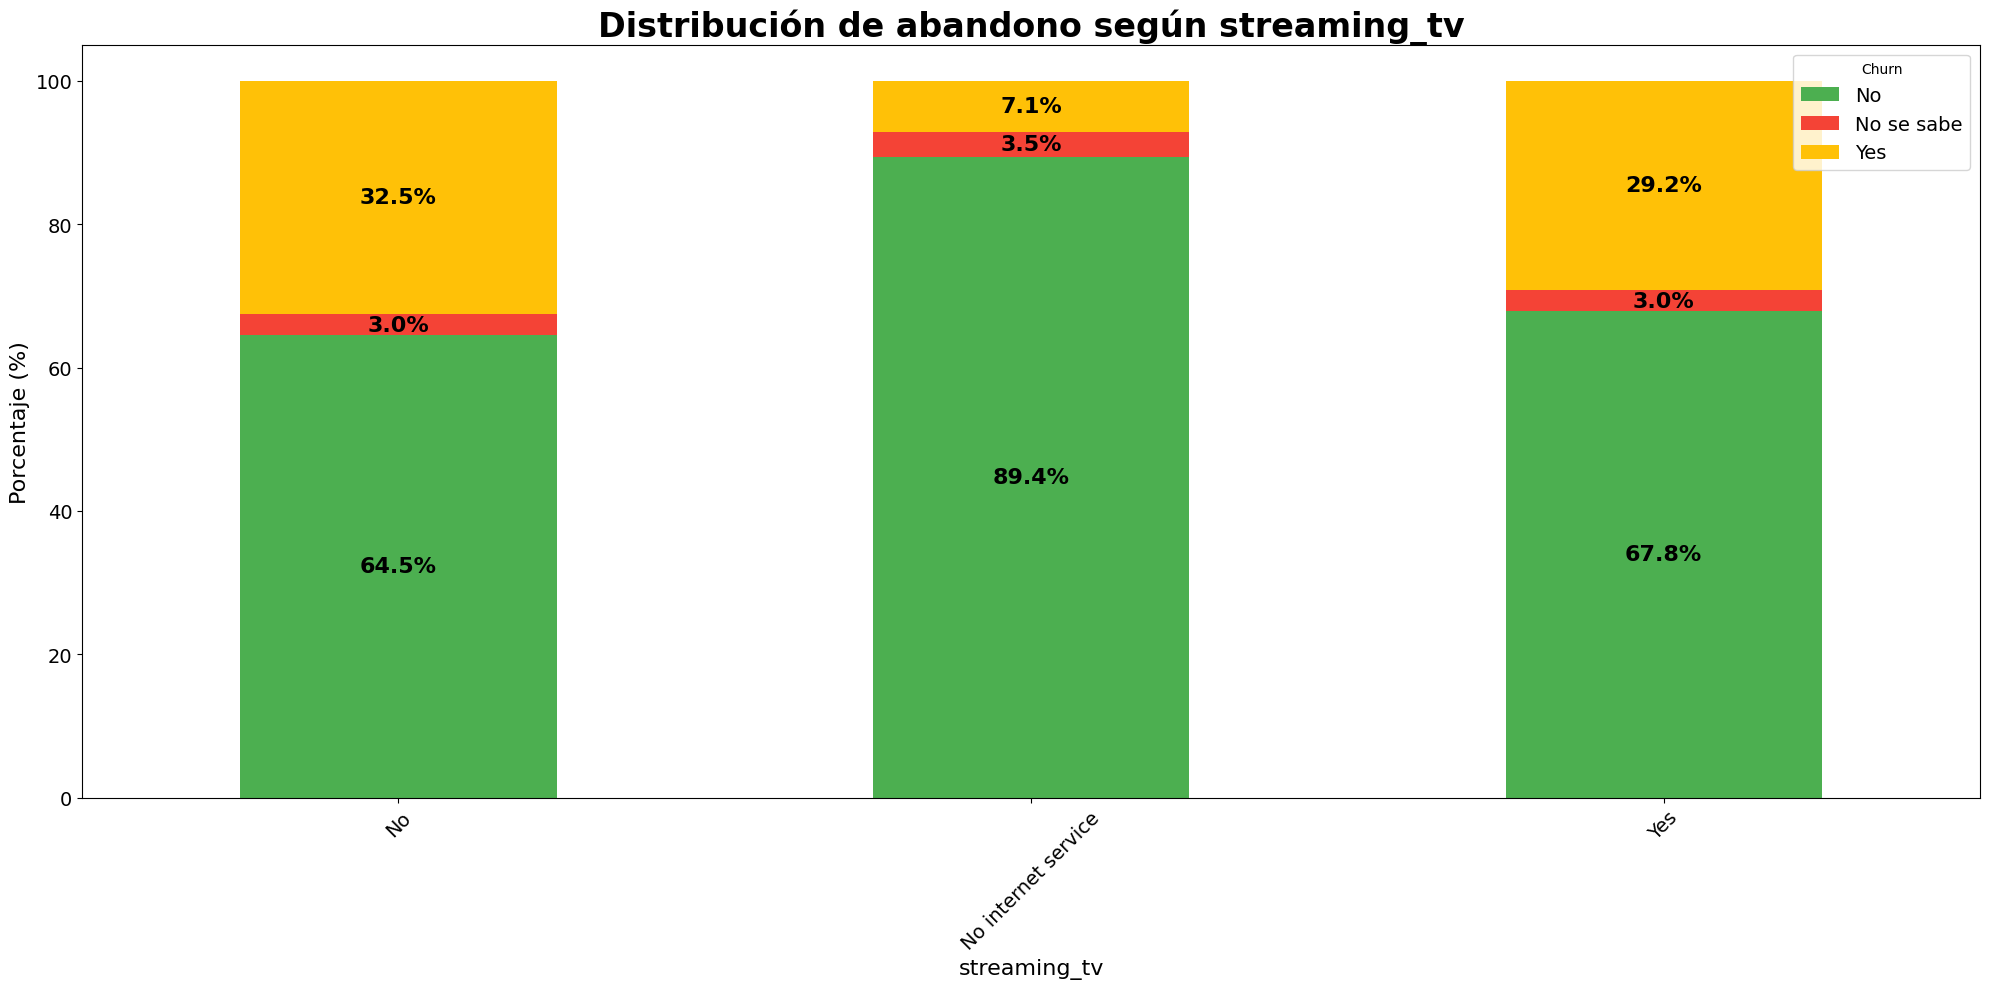

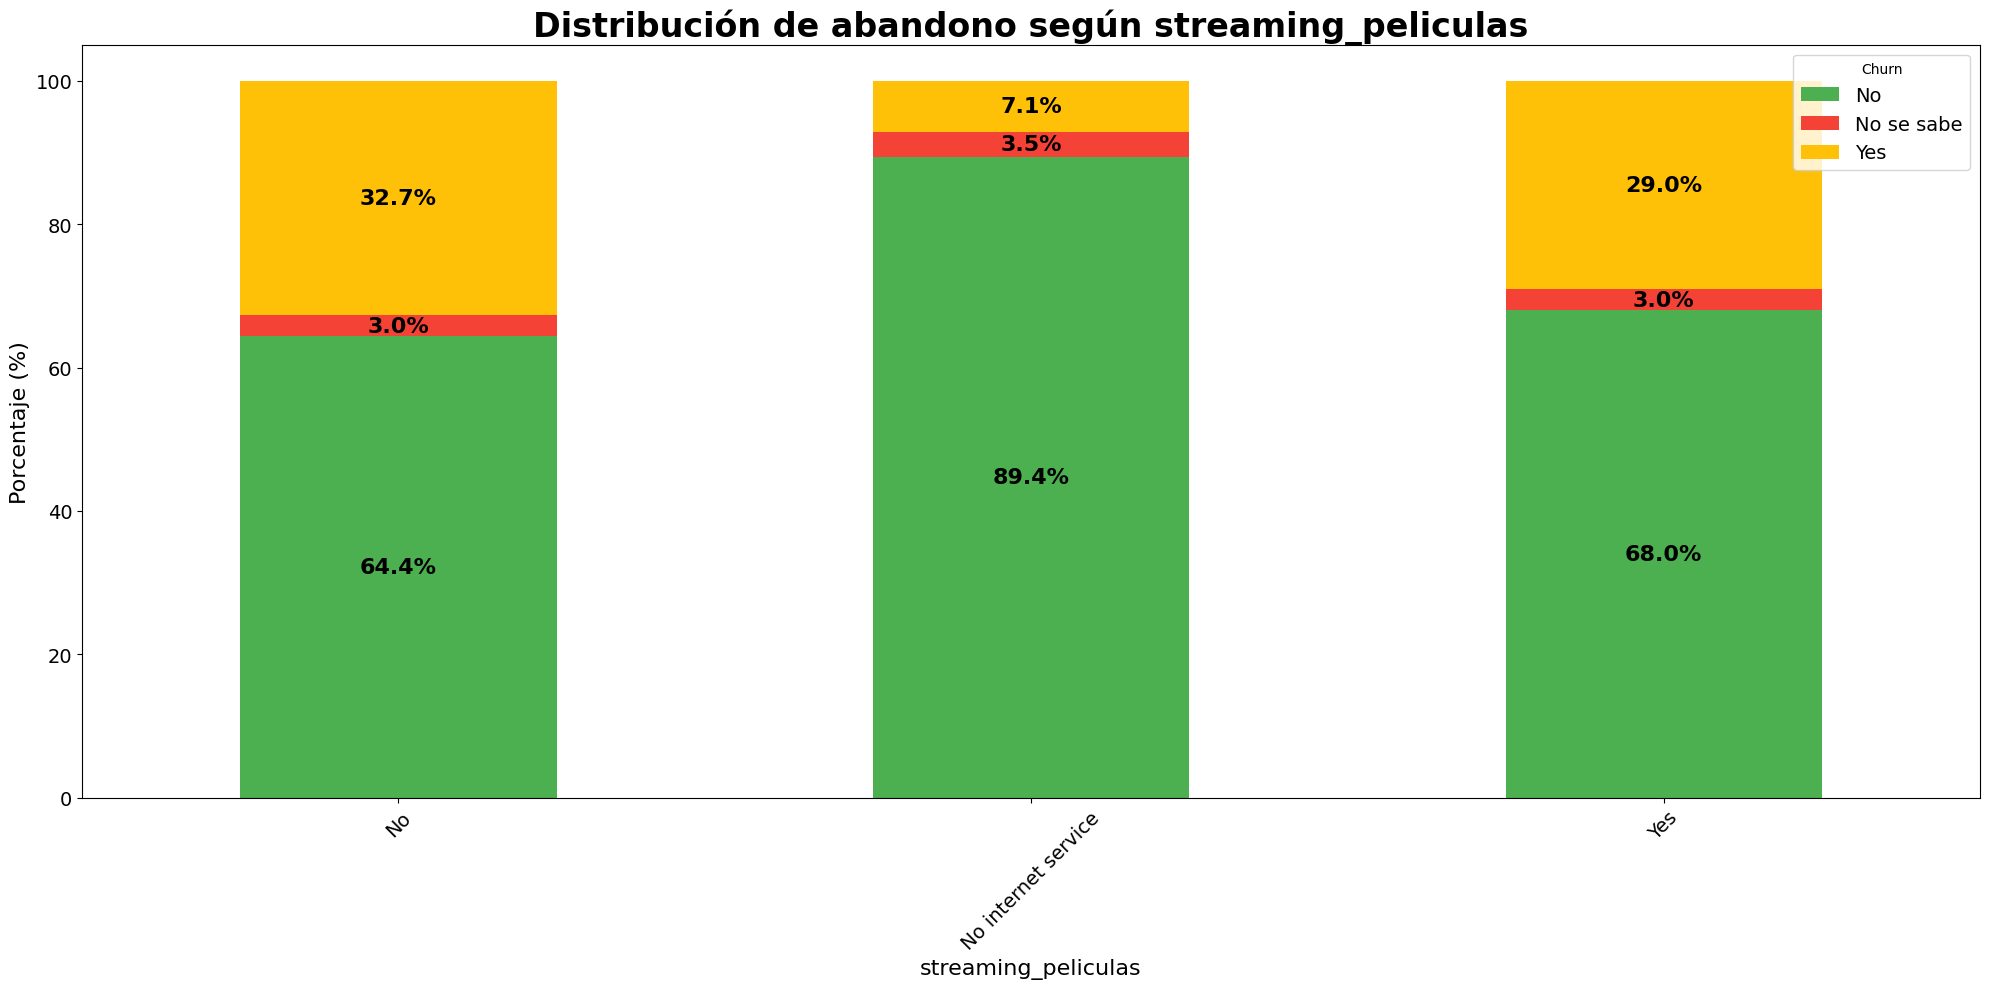

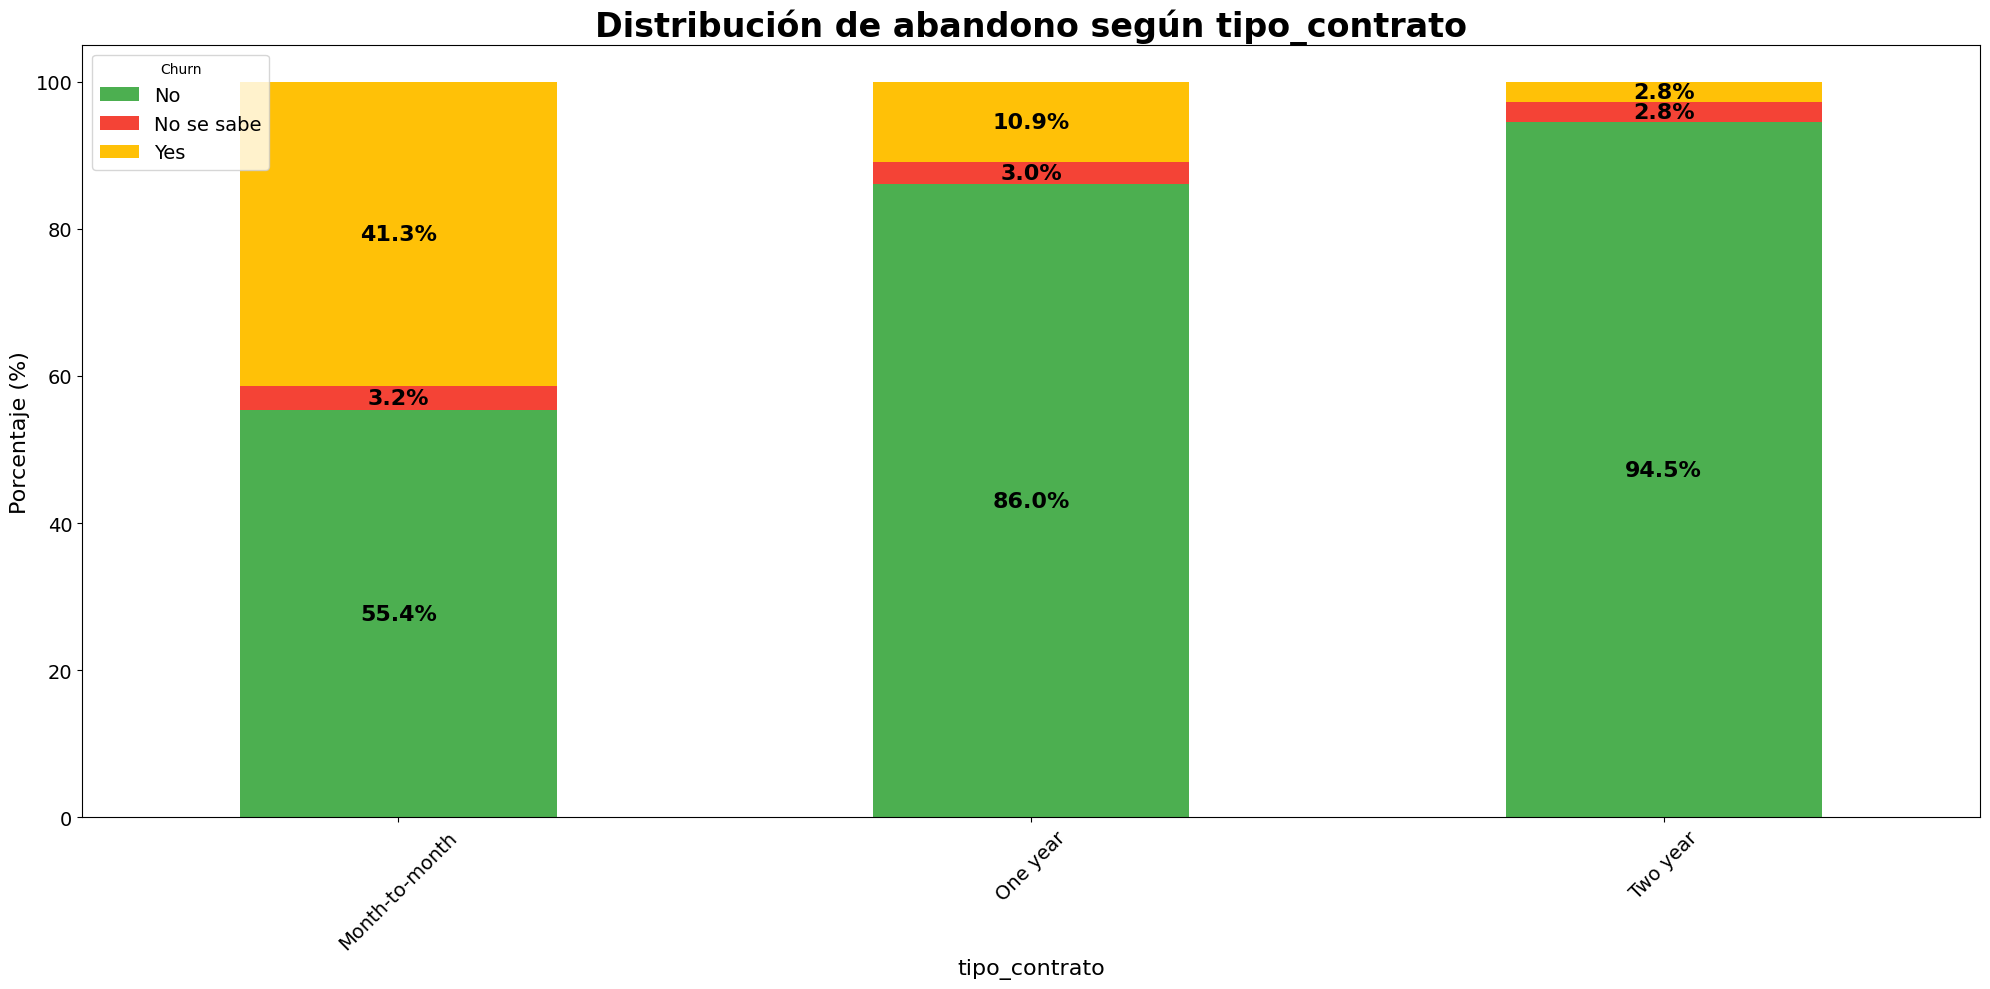

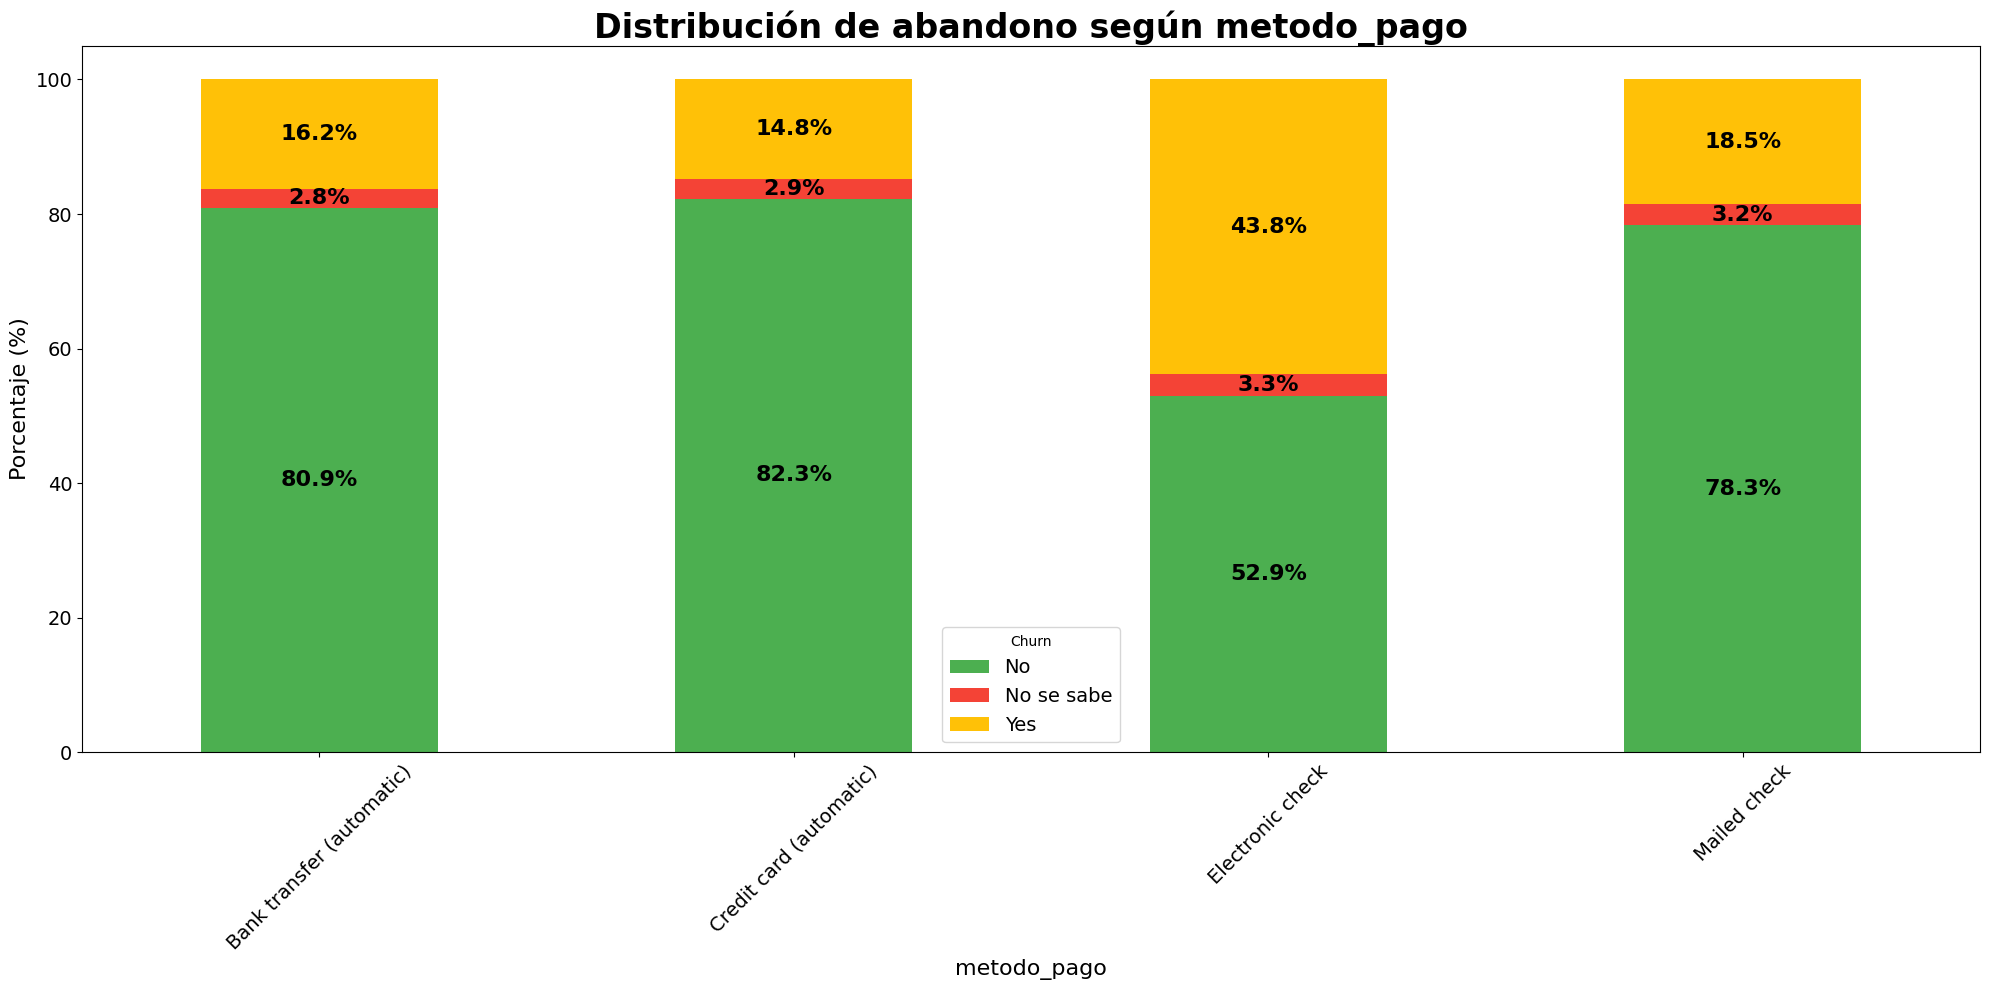

In [309]:
categoricas_analizar = df.select_dtypes(include=["object"]).columns.drop("churn")

for col in categoricas_analizar:
    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(20,10))

    # Conteo de cada combinación categoría vs churn
    counts = df.groupby([col, "churn"]).size().unstack(fill_value=0)

    # Convertimos a porcentaje por categoría
    counts_perc = counts.div(counts.sum(axis=1), axis=0) * 100

    # Gráfico de barras apiladas
    counts_perc.plot(kind="bar", stacked=True, color=["#4CAF50", "#F44336", "#FFC107"], ax=ax)

    # Añadir porcentaje sobre cada sección
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width/2, y + height/2, f"{height:.1f}%", ha="center", va="center", fontsize=16, fontweight="bold")

    # Títulos y etiquetas
    ax.set_title(f"Distribución de abandono según {col}", fontsize=24, fontweight="bold")
    ax.set_ylabel("Porcentaje (%)", fontsize=16)
    ax.set_xlabel(col, fontsize=16)

    # Ticks
    ax.tick_params(axis="x", labelsize=14, rotation=45)
    ax.tick_params(axis="y", labelsize=14)

    # Leyenda
    ax.legend(title="Churn", prop={"size":14}, loc="best")

    plt.tight_layout()
    plt.show()

###Recuento de evasión por numéricas

###Informe Final

##EXTRA

###Análisis de correlación entre variables